# Gamma Distributions

In [18]:
import jax
import jax.numpy as jnp
from jax.scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [19]:
os.environ["LATEXIFY"] = ""
os.environ["FIG_DIR"] = "figures"
latexify(width_scale_factor=2, fig_height=2)

In [20]:
def make_graph(data):
    x = data["x"]
    a_list = data["a_list"]
    b_list = data["b_list"]
    props = data["props"]
    fig_name = data["fig_name"]

    for a, b, prop in zip(a_list, b_list, props):
        y = gamma.pdf(x, a, scale=1 / b, loc=0)
        plt.plot(x, y, prop, label="a=%.1f,  b=%.1f" % (a, b))
        plt.xlabel("$x$")
        plt.ylabel("$p(x)$")
        plt.legend(loc="upper right")
        plt.title(fig_name)
        sns.despine()

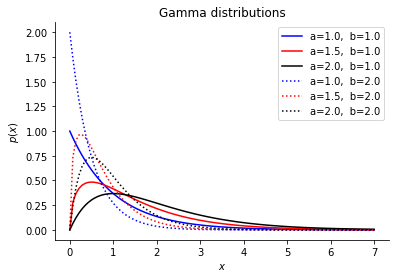

In [14]:
x = jnp.linspace(0, 7, 100)
a_list = [1.0, 1.5, 2.0, 1.0, 1.5, 2.0]
b_list = [1.0, 1.0, 1.0, 2.0, 2.0, 2.0]
props = ["b-", "r-", "k-", "b:", "r:", "k:"]
data = {"x": x, "a_list": a_list, "b_list": b_list, "props": props, "fig_name": "Gamma distributions"}
make_graph(data)
savefig("gammadist")

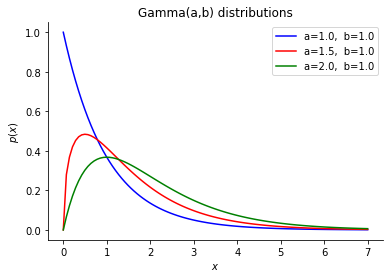

In [15]:
x = jnp.linspace(0, 7, 100)
a_list = [1, 1.5, 2]
b_list = [1, 1, 1]
props = ["b-", "r-", "g-"]
data = {"x": x, "a_list": a_list, "b_list": b_list, "props": props, "fig_name": "Gamma(a,b) distributions"}
make_graph(data)

saving image to figures/gamma_1_1_latexified.pdf
Figure size: [3.  1.5]


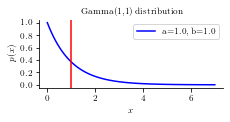

In [23]:
latexify(width_scale_factor=2, fig_height=1.5)
x = jnp.linspace(0, 7, 100)
a_list = [1]
b_list = [1]
props = ["b-"]
data = {"x": x, "a_list": a_list, "b_list": b_list, "props": props, "fig_name": "Gamma(1,1) distribution"}
make_graph(data)
plt.axvline(1, color="r")
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
savefig("gamma_1_1")
plt.show()

In [7]:
from ipywidgets import interact


@interact(a=(0.1, 5), b=(0.1, 5))
def generate_random(a, b):
    data = {
        "x": jnp.linspace(0, 7, 100),
        "a_list": [a],
        "b_list": [b],
        "props": ["b"],
        "fig_name": "Gamma distributions",
    }
    make_graph(data)
    plt.yticks(jnp.arange(0, 6, step=1))

interactive(children=(FloatSlider(value=2.5500000000000003, description='a', max=5.0, min=0.1), FloatSlider(va…